<a href="https://colab.research.google.com/github/Equivocal-Richie/Linear_Algebra/blob/main/Matrix_Arithmetic_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scenario: E-commerce Product Recommendations Based on User Ratings**

**Problem Overview:**

Imagine you work for an e-commerce platform. You have user ratings for various products, stored in a matrix. You want to use matrix arithmetic to generate product recommendations for users based on their existing ratings.

**Dataset (Conceptual):**

    User Ratings Matrix (R):
        1. Rows represent users.
        2. Columns represent products.
        3. Values represent user ratings (e.g., 1-5 stars, 0 if not rated).

## **Basic Application: Calculating Average Product Ratings**

**Question 1:**

Given the user ratings matrix R, calculate the average rating for each product.

In [2]:
import numpy as np

# Sample user ratings matrix (where Rows=Users and Columns=Products)
R = np.array([
    [5, 4, 0, 3],  # User 1 ratings
    [4, 0, 2, 5],  # User 2 ratings
    [0, 3, 5, 1],  # User 3 ratings
    [5, 4, 4, 0],  # User 4 ratings
    [0, 5, 4, 3]   # User 5 ratings
])

# Calculate average ratings for each product (column-wise)
average_ratings = np.mean(R, axis=0)
# axis = 0 specifies that the mean should be calculated along the columns (products).

# Print average ratings for each product individually
num_products = R.shape[1]  # Get the number of products (columns)

for i in range(num_products):
    print(f"Average rating for Product {i + 1}: {average_ratings[i]}")

Average rating for Product 1: 2.8
Average rating for Product 2: 3.2
Average rating for Product 3: 3.0
Average rating for Product 4: 2.4


## **Intermediate Application: User Similarity Based on Ratings**

**Question 2:**

Calculate the similarity between users based on their ratings using dot products.

In [13]:
from sklearn.preprocessing import normalize

# User Ratings Matrix - same as before
R = np.array([
    [5, 4, 0, 3],  # User 1 ratings
    [4, 0, 2, 5],  # User 2 ratings
    [0, 3, 5, 1],  # User 3 ratings
    [5, 4, 4, 0],  # User 4 ratings
    [0, 5, 4, 3]   # User 5 ratings
])

# Calculate user similarity matrix (dot product of user rating vectors)
# np.dot performs matrix multiplication, which in this case represents the dot product of user rating vectors.
user_similarity = np.dot(R, R.T)  # R.T is the transpose of R (swapping rows and columns)
"""
Why Transpose?
It allows us to compare users to users instead of users to products when calculating the dot product.

What happens when you transpose?
It swaps rows to columns and vice versa, effectively flipping the matrix along its diagonal.
"""
normalized_similarity = normalize(user_similarity, axis=1, norm='l2') # normalize the results in the range of 0 - 1

k = 3  # Number of top similar users to display

for i in range(normalized_similarity.shape[0]):
    top_indices = np.argsort(normalized_similarity[i])[-k:]  # Get indices of top k similar users
    top_users = top_indices + 1  # Adjust indices to user IDs (starting from 1)
    print(f"Top {k} similar users for User {i + 1}: {top_users}")

Top 3 similar users for User 1: [2 4 1]
Top 3 similar users for User 2: [4 1 2]
Top 3 similar users for User 3: [4 3 5]
Top 3 similar users for User 4: [5 1 4]
Top 3 similar users for User 5: [4 3 5]


Heatmap visualization of the similarities between the users for a more intuitive understanding.

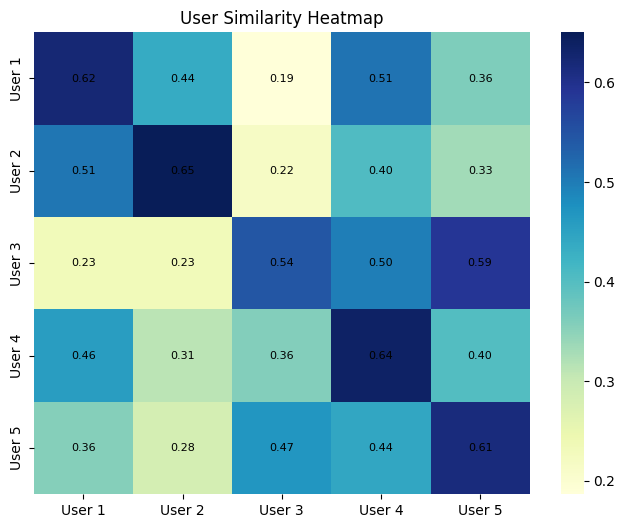

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
user_labels = ['User 1', 'User 2', 'User 3', 'User 4', 'User 5']
sns.heatmap(normalized_similarity, xticklabels=user_labels, yticklabels=user_labels, annot=True, cmap="YlGnBu", fmt=".2f", annot_kws={"size": 8, "color": "black"})
plt.title("User Similarity Heatmap")
plt.show()

## **Advanced Application: Product Recommendations Using Matrix Multiplication**

**Question 3:**

Using the user ratings matrix **R** and the average product ratings, generate a recommendation score for each user for each product.

In [3]:
# User Ratings Matrix - same as before
R = np.array([
    [5, 4, 0, 3],  # User 1 ratings
    [4, 0, 2, 5],  # User 2 ratings
    [0, 3, 5, 1],  # User 3 ratings
    [5, 4, 4, 0],  # User 4 ratings
    [0, 5, 4, 3]   # User 5 ratings
])

# Calculate average product ratings
average_ratings = np.mean(R, axis=0)

# Create a matrix of average ratings, where each row is the average ratings vector.
average_ratings_matrix = np.tile(average_ratings, (R.shape[0], 1))
"""
# np.tile repeats average_ratings to create a matrix with the same number of rows as R.
"""
#Calculate the recommendation score.
recommendation_score = R * (average_ratings_matrix / np.max(average_ratings_matrix))
"""
Explanation:
Dividing by np.max normalizes the average rating scores.
Multiplying R by the normalized average ratings provides a recommendation score.
"""

print("Recommendation Score Matrix:", recommendation_score) # The recommendation score reflects both user ratings and overall product popularity.

Recommendation Score Matrix: [[4.375  4.     0.     2.25  ]
 [3.5    0.     1.875  3.75  ]
 [0.     3.     4.6875 0.75  ]
 [4.375  4.     3.75   0.    ]
 [0.     5.     3.75   2.25  ]]


**Interpreting the results**

In [5]:
import numpy as np

def group_users_by_product(recommendation_score, threshold=3):
    """
    Groups users by the products they are likely to be recommended.

    Args:
        recommendation_score (np.ndarray): The recommendation score matrix.
        threshold (float): The minimum recommendation score for a product to be
                           considered recommended to a user.

    Returns:
        dict: A dictionary where keys are product IDs and values are lists of
              user IDs who are likely to be recommended that product.
    """

    product_user_groups = {}  # Initialize an empty dictionary
    num_users, num_products = recommendation_score.shape

    for product_id in range(num_products):  # Iterate through products
        recommended_users = []
        for user_id in range(num_users):  # Iterate through users
            # If recommendation score is above the threshold
            if recommendation_score[user_id, product_id] >= threshold:
                recommended_users.append(user_id + 1)  # Add user to the list

        product_user_groups[product_id + 1] = recommended_users  # Assign list to product

    return product_user_groups

# Usage with the recommendation_score matrix from previous code:
product_user_groups = group_users_by_product(recommendation_score)

# Print the results:
for product_id, users in product_user_groups.items():
    print(f"Product {product_id}: Recommended for users {users}")

Product 1: Recommended for users [1, 2, 4]
Product 2: Recommended for users [1, 3, 4, 5]
Product 3: Recommended for users [3, 4, 5]
Product 4: Recommended for users [2]
